In [1]:
from IPython.display import Image

다중 선형회귀(multiple linear regression)
다중 선형회귀를 분석하기 전에 일단 선형회귀부터 간단하게 알아보자.

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Normdist_regression.png/300px-Normdist_regression.png)

통계학에서 선형 회귀는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다.
기본적인 모델은 ${\displaystyle \mathbf {y} =\mathbf {X} {\boldsymbol {\theta }1}+ {\boldsymbol {\theta }0} +{\boldsymbol {\varepsilon }},\,}$ 이렇고, 
잘 보면 알겠지만 결국 기존의 분산점을 기준으로 최적화된 1차방정식 $y=ax+b$를 찾는것이 목적이라 할 수 있겠다.

${\displaystyle {\boldsymbol {\theta }}\,}$ 는 p차원 파라미터 벡터이다. 이것의 각 원소는 회귀 계수라고 불리기도 한다.
 파라미터 벡터의 원소는 종속 변수에 대한 편미분으로 해석할 수도 있다.

${\displaystyle \varepsilon _{i}}$ 는 오차항, 노이즈이다.
 이 변수는 종속 변수 yi에 대한 모든 오차 요인을 포함한다.

예제. 작은 공을 던져 올리고, 그것의 높이 $hi$ 를 시간 $ti$ 에서 측정한다고 하자. 이를 수식으로 표현하면 다음과 같다.

${\displaystyle h_{i}=\theta _{1}t_{i}+\theta _{2}t_{i}^{2}+\varepsilon _{i},}$ ${\displaystyle h_{i}=\theta _{1}t_{i}+\theta _{2}t_{i}^{2}+\varepsilon _{i},}$

이 식에서 $\mathbf{\theta}1$ 는 공의 초기 속도이며, $\mathbf{\theta}2$ 는 중력에 비례하는 계수이다. εi는 측정 오차를 의미한다. 
선형 회귀는 측정한 데이터를 사용해 $\mathbf{\theta}1$ 과 $\mathbf{\theta}2$ 를 추정할 때 사용할 수 있다. 이렇게 세워진 모델은 시간 변수에 대해서는 비선형이지만, 파라미터 $\mathbf{\theta}1 하고 \mathbf{\theta}2$ 에 대해서는 선형이다.
 만약 독립 변수를 다음과 같이 표현하면, $ xi = (xi1, xi2)  = (ti, ti^2)$, 식을 다음과 같이 쓸 수 있다.

${\displaystyle h_{i}=\mathbf {x} _{i}^{\rm {T}}{\boldsymbol {\theta }}+\varepsilon _{i}.}{\displaystyle h_{i}=\mathbf {x} _{i}^{\rm {T}}{\boldsymbol {\theta }}+\varepsilon _{i}.}$

좀더 간단히 살펴본다면

${\displaystyle h_{i}=\theta _{1}t_{i}+\theta _{2}t_{i}^{2}+\varepsilon _{i},}$ ${\displaystyle h_{i}=\theta _{1}t_{i}+\theta _{2}t_{i}^{2}+\varepsilon _{i},}$

${y=x0t+ \frac{1}{2}\ *gt^2}$  앱실론은 오차입니다. 오차라는게 없으면 선형모델이 정확히 일치하지 않으면 무한히 루프를 돌릴테니
어느정도 수준이 되면 그만해도 된다. 라고 알려주는거죠

식이랑 아주 유사하지 않나? 즉 여기서 물체가 떨어지는걸 여러번 실험하면서 ${\mathbf {\theta}1,  {\theta}2}$ 를 유추해내는게 선형회귀의 본질이라 볼 수 있겠다.  

여기서 근데 그럼 여기서 문제가 하나 생긴다. 도대체 어떻게 우리는 컴퓨터한테 저 점들을 보고 최적화된 선을 그리라고 명령할 수 있을까?
이제 여기서 등장하는 개념이 비용함수(cost function)이다.
머신러닝에서 처음 선형회귀를 공부할때 등장하는 그것 경사하강법의 본질은 이 cost라는 애를 줄이는게 목적인것!
cost함수는 일반적으로 J로 표현하고 내부에서 하는일은 이렇다.

1. ${\mathbf {\theta}0,  {\theta}1}$ 를 임의의 값으로 시작한다. 
2. ${\mathbf {\theta}}$ 값을 이용해서 가설(예측) 함수를 만든다.
3. 이제 가설함수 h(x) 값이랑 실제 함수값 y 를 비교해보자.
4. 가설함수랑 실제 함수의 값차이를 cost라고 한다.
5. cost가 0에 가까워지면 최적화된 선에 가까워짐을 의미한다.

수식 유도는 복잡하니 실제로 우리가 만들어서 쓸 함수만 보자 

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/Cost_Function_Formula.png) 

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/Square_Error_Function.png)

이를 그래프로 나타내면 다음과 같은 형태가 나온다.

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/Convex_Function.png)

기울기는 양수나 음수 무엇이 나오냐에 따라 ${\mathbf {\theta}}$ 값을 늘릴지 감소시킬지 결정할 수 있는데 예를들자면

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/Negative_Slope.png) 

이 상황에선 ${\mathbf {\theta}}$ 값이 증가하는게 올바른 학습에 도움이 될것이다.

그리고 이제 머신러닝에서 정말 자주쓰이는 학습률(learning rate) 이 등장한다.

기울기 값이 급격하게 변화하면 데이터가 이상하게 측정될거고 
반대로 기울기가 아주 천천히 바뀌면 프로그램 돌리는데 한세월 걸릴거다. 
이 크기를 제어하는데 쓰는게 학습률 ${{\alpha}}$ 고 이에따른  ${\mathbf {\theta}}$ 값 변화에 대한 최종적인 식은 이렇게 된다.

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/Gradient_Descent_Formula.png)

학습률은 일반적으로 0.01을 사용한다.

이제 개념은 대충 짚어봤으니 실제로 코드로 확인을 해보자

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/univariate_profits_and_populations_from_the_cities.csv')
df.head() # To get first n rows from the dataset default value of n is 5

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


이 자료는 도시의 인구수와 푸드트럭 이익에 대한 상관관계를 나타내는 자료다. 1열은 인구 2열은 이익을 나타내고 있다.

In [3]:
X = df.values[:, 0]  # get input values from first column
y = df.values[:, 1]  # get output values from second column
m = len(y) # Number of training examples
print('X = ', X[: 5]) # Show only first 5 records
print('y = ', y[: 5])
print('m = ', m)

X =  [6.1101 5.5277 8.5186 7.0032 5.8598]
y =  [17.592   9.1302 13.662  11.854   6.8233]
m =  97


한번 시각화를 진행해보자.

Text(0.5, 1.0, 'Scatter plot of training data')

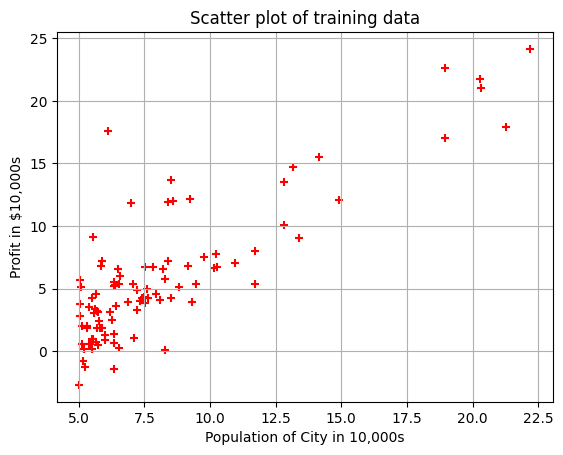

In [4]:
plt.scatter(X,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

데이터만 보면 뭔가 직선이 예쁘게 잘 나오게 생겼다.
이제 가설함수를 만들어보자.
for 루프를 돌려서 하나하나 만들어도 되고 
행렬을 이용해서 한번에 만들어도 되지만
행렬이 계산이 압도적으로 빠르니까 행렬을 쓰자.

단 주의할점은 행렬을 그대로 쓰면 오류가 난다.
이유는 

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/X_matrix_2x1.png)

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/theta_matrix_2x1.png)

얘네는 차원이 달라서 수용이 불가한것, ${\mathbf {\theta}0}$ 을 추가해줘야 하니까 행렬 x에다가 1로 된 열을 추가하자. 

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/X_matrix_2x2.png)

그렇게 되면

![title](https://raw.githubusercontent.com/satishgunjal/Images/master/X_multiply_theta.png)

이렇게 이쁜 1차원 행렬이 완성된다.
![title](https://raw.githubusercontent.com/satishgunjal/Images/master/X_multiply_theta_result.PNG)

In [5]:
#Lets create a matrix with single column of ones
X_0 = np.ones((m, 1)) #1로 가득찬 행렬을 만드는것 뒤에 요소로 몇차원으로 만들지 정할 수 있다.
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [6]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
X_1 = X.reshape(m, 1)
X_1[:5]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598]])

In [7]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column wise) to make a single 2D array. 
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

이제 ${\mathbf {\theta}}$ 값도 한번 가지고 놀아보자. 
${\mathbf {\theta}}$ 은 일단 0으로 시작할것이다.
어떻게 초기화하든 그건 상관없다. 위에 그래프를 보고 기울기가 어느쪽에 가까울거 같은데? 싶어서 그냥 그 기울기를 넣어도 문제가 없다는것

In [8]:
theta = np.zeros(2)
theta

array([0., 0.])

이제 비용함수를 정의해보자.
여기서 쓰이는 numpy 개념은 세가지가 존재한다.
numpy.dot() 이 함수는 두 배열의 내적을 반환한다. 2차원 벡터의 경우 행렬 곱셈과 동일하다.
numpy.subtract() 이 함수는 요소별 빼기를 수행한다.
numpy.square() 이 함수는 요소별 제곱을 수행한다.

In [9]:
def compute_cost(X, y, theta):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  #print('predictions= ', predictions[:5])
  errors = np.subtract(predictions, y)
  #print('errors= ', errors[:5]) 
  sqrErrors = np.square(errors)
  #print('sqrErrors= ', sqrErrors[:5]) 
  J = 1 / (2 * m) * np.sum(sqrErrors)

  return J

In [10]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 32.072733877455676


주어진 ${\mathbf {\theta}}$ 값에 대한 비용을 반환하는 compute_cost() 함수를 만들었으니
경사하강법을 구현한 함수 gradient_descent() 함수를 만들어 보자.
이 함수에서 루프를 실행하고 모든 반복에 대해 배치 경사 하강 알고리즘을 사용하여 세타 값을 계산한다.
그리고 이 ${\mathbf {\theta}}$ 값을 사용하여 비용 함수를 사용하여 '비용'을 계산하고 리스트에 저장한다.
알고리즘이 제대로 작동하고 주어진 매개변수(알파 및 세타)가 정확하면 '비용' 값은 모든 단계에서 감소해야 한다.
최종목적은 우리는 cost 값에 해당하는 ${\mathbf {\theta}}$ 매개변수를 얻는것
즉 코스트가 가장 작아지는 값을 찾는것

In [11]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value. 

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """
  cost_history = np.zeros(iterations) #반복하는 횟수만큼 cost를 저장할 0이 들어있는 행렬 만들기

  for i in range(iterations): #반복 시작
    predictions = X.dot(theta) #예측값은 X에 세타를 곱해준  벡터 내적
    #print('predictions= ', predictions[:5])
    errors = np.subtract(predictions, y) #에러는 예측값과 y를 빼준 값
    #print('errors= ', errors[:5])
    sum_delta = (alpha / m) * X.transpose().dot(errors)#세타의 수정값 sum_delta 공식 그대로 넣은것 
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - sum_delta #수정된 세타의 값 

    cost_history[i] = compute_cost(X, y, theta) #cost를 계산한 값에 관한 기록을 cost history에 저장하자.   

  return theta, cost_history

In [12]:
theta = [0., 0.]
iterations = 1500
alpha = 0.01

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [-3.63029144  1.16636235]
cost_history = [6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


자 이제 과연 함수가 제대로 작동했을지 확인해보자.

In [13]:
print(X[:,1]) #97개의 데이터에 근거한 x값 

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]


In [14]:
X.dot(theta) #97개의 데이터에 근거한 y값

array([ 3.49629916,  2.81700972,  6.30548288,  4.53797737,  3.20435866,
        6.14720751,  5.08990004,  6.37488144,  3.93496804,  2.2652037 ,
        3.03045403, 12.89006489,  3.05763028,  6.17694975,  2.94880867,
        2.64403819,  3.79407147,  2.35326405,  3.86895193,  4.61682347,
        3.58844178, 20.0118734 ,  2.7731545 ,  3.74823343,  2.8603984 ,
       18.46644329, 11.33180479,  9.14954083, 11.73769889, 22.26645183,
        2.49591017,  4.05533663,  7.15646085,  3.24168226,  5.94682646,
        5.62292763,  5.81246151,  2.90868581, 11.34113569,  3.78007512,
        2.67611315,  4.39719744, 10.02547896,  3.10393486,  5.49614404,
        4.64283335,  2.28339895,  3.1362431 , 10.01614806,  2.83322216,
        5.16431395,  2.56041001,  5.02866601,  5.23767815,  3.75604805,
        3.78649011,  3.68769922,  2.94764231,  7.22877531,  7.39603168,
        6.66332285,  2.41064908, 21.18873301, 13.75783848, 18.48277236,
        4.78874528,  6.04480089,  8.30859358,  2.78400167, 20.09

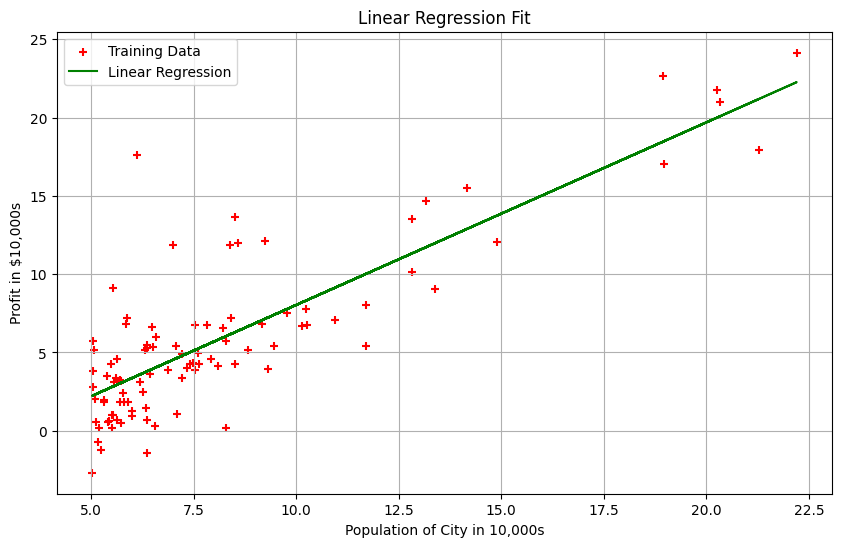

In [15]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data') #기존 트레이닝 데이터셋
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') #선형회귀를 이용해 얻은 세타값을 이용한 선형 그래프 y=ax+b

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

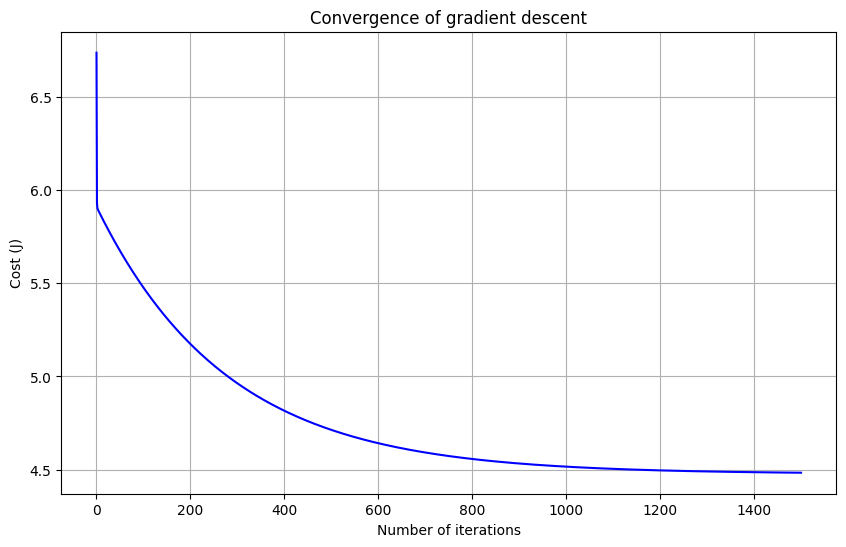

In [16]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')#경사 하강법이 적용된 모델 확인

In [17]:
predict1 = np.array([1, 3.5]).dot(theta)  #적용한 세타 모델을 이용해 인구수에 따른 수익 예측
print("For population = 35,000, our prediction of profit is", predict1 * 10000)

predict2 = np.array([1, 7]).dot(theta)
print("For population = 70,000, our prediction of profit is", predict2 * 10000)

For population = 35,000, our prediction of profit is 4519.7678677017675
For population = 70,000, our prediction of profit is 45342.45012944712


In [19]:
from sklearn.linear_model import LinearRegression

LinearRegression.predict(np.array([1, 3.5]),theta)

AttributeError: 'numpy.ndarray' object has no attribute '_decision_function'